<div style="font-size:38px;color:green"><u>Self Organizing Maps (SOM)</u></div><br/><br/>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Credit_Card_Applications.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)
x


array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [24]:
# Training SOM
from minisom import MiniSom
som = MiniSom(x = 10,y = 10,input_len = 15,sigma = 1.0,learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x,num_iteration=100)

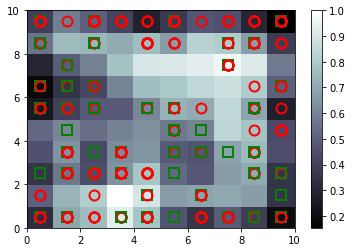

In [25]:
# predicting and visualizing

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(x):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [26]:
# finding mapping

mappings = som.win_map(x)
mappings

defaultdict(list,
            {(0, 4): [0.10690788815075791,
              1.0,
              0.40977443609022557,
              0.0014285714285714286,
              0.5,
              0.6923076923076923,
              0.375,
              0.0014035087719298245,
              1.0,
              0.014925373134328358,
              0.28],
             (2, 2): [0.0, 0.0, 0.0, 0.0]})